# Capstone Project – The Battle of Neighbourhoods

## Finding a Better Neighbourhood in Scarborough, Toranto.

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)
* [References](#references)

## A. Introduction <a name="introduction"></a>

The purpose of this project is to help people in exploring better facilities around their neighborhood. It will help people making smart and efficient decision on selecting great neighborhood out of numbers of other neighborhoods in Scarborough, Toranto.

Scarborough is an administrative division of Toronto, Ontario, Canada. Situated atop the Scarborough Bluffs, it occupies the eastern part of the city. Scarborough is contained within the borders of Victoria Park Avenue on the west, Steeles Avenue to the north, Rouge River and the city of Pickering to the east, and Lake Ontario to the south. It borders Old Toronto, East York and North York in the west and the city of Markham in the north. Scarborough was named after the English town of Scarborough, North Yorkshire.

Lots of people are migrating to various states of Canada and needed lots of research for good housing prices and reputated schools for their children. This project is for these people who are looking for better neighborhoods. For ease of access to Kaffe shops, good schools, supermarkets, medical shops, grocery shops, malls, theatre, hospitals, people with same characters, e.t.c.

This project aims to create an analysis of features for a people migrating to Scarborough to search a best neighborhood as a comparative analysis between neighborhoods. The features include median housing price and better school according to ratings, crime rates of that particular area, road connectivity, weather conditions, good management for emergency, water resources both freash and waste water and excrement conveyed in sewers and recreational facilities.

It will help people to get awareness of the area and neighborhood before moving to a new city, state, country or place for their work or to start a new fresh life.

[https://en.wikipedia.org/wiki/Scarborough,_Toronto](https://en.wikipedia.org/wiki/Scarborough,_Toronto)

### Location

Scarborough is a popular destination for new immigrants in Canada to reside. As a result, it is one of the most diverse and multicultural areas in the Greater Toronto Area, being home to various religious groups and places of worship. Although immigration has become a hot topic over the past few years with more governments seeking more restrictions on immigrants and refugees, the general trend of immigration into Canada has been one of on the rise.

The vast majority of Scarborough's population is composed of immigrants who have arrived in the last four decades, and their descendants. In 2006, 57% of residents were foreign-born. Visible minorities make up 67.4% of the population. The population is 22.0% South Asian, 19.5% Chinese, 10.3% Black, and 6.5% Filipino. The remaining visible minority groups each represented less than 2% of the population. The immigrant population has created vibrant multicultural locales in various areas of Scarborough.

### Problem

The major purpose of this project is to suggest a better neighborhood in a new city for an individual who would like to live there. We look onto factors  such as social presence in society in terms of like minded people, connectivity to the airport, bus stands, city centers, markets and other daily needs things nearby.

* Sorted list of house in terms of housing prices in a ascending or descending order
* Sorted list of schools in terms of location, fees, rating and reviews

## B. The Data <a name="data"></a>

### The data

In this project, we will use Scarborough dataset which we scrapped from wikipedia on Week 3. The dataset consists of latitudes and longitudes and zip codes of various neighbourhoods.

Data Link: [https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)

This is a list of postal codes in Canada where the first letter is M. Postal codes beginning with M are located within the city of Toronto in the province of Ontario. Only the first three characters are listed, corresponding to the Forward Sortation Area.


### Foursquare API Data

We will need data about different venues in different neighborhoods for that specific borough. In order to gain that information we will use "Foursquare" locational information. 

Foursquare is a location data provider with information about all venues and events within an area of interest. Such information includes venue names, locations, menus, ratings and even photos. As such, the foursquare location platform will be used as the sole data source since all the stated required information can be obtained through the API.

After finding the list of neighborhoods, we then connect to the Foursquare API to gather information about venues inside each and every neighborhood. For each neighborhood, we have chosen the radius to be 100 meter.

The data retrieved from Foursquare contained information of venues within a specified distance of the longitude and latitude of the postcodes. The information obtained per venue as follows:

    1. Neighborhood
    2. Neighborhood Latitude
    3. Neighborhood Longitude
    4. Venue
    5. Name of the venue e.g. the name of a store or restaurant
    6. Venue Latitude
    7. Venue Longitude
    8. Venue Category

## C. Analysis <a name="analysis"></a>

In [1]:
# Import all the required libraries

import pandas as pd
import requests
import numpy as np
import geocoder
import folium
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
import xml
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("All Required Libraries Imported!")

All Required Libraries Imported!


In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
extracting_data = requests.get(url).text
wiki_data = BeautifulSoup(extracting_data, 'lxml')

In [10]:
column_names = ['Postalcode','Borough','Neighborhood']
toronto = pd.DataFrame(columns = column_names)

content = wiki_data.find('div', class_='mw-parser-output')
table = content.table.tbody
postcode = 0
borough = 0
neighborhood = 0

for tr in table.find_all('tr'):
    i = 0
    for td in tr.find_all('td'):
        if i == 0:
            postcode = td.text.strip('\n')
            i = i + 1
        elif i == 1:
            borough = td.text.strip('\n')
            i = i + 1
        elif i == 2: 
            neighborhood = td.text.strip('\n').replace(']','')
    toronto = toronto.append({'Postalcode': postcode,'Borough': borough,'Neighborhood': neighborhood},ignore_index=True)

In [11]:
toronto = toronto[toronto.Borough!='Not assigned']
toronto = toronto[toronto.Borough!= 0]
toronto.reset_index(drop = True, inplace = True)
i = 0
for i in range(0,toronto.shape[0]):
    if toronto.iloc[i][2] == 'Not assigned':
        toronto.iloc[i][2] = toronto.iloc[i][1]
        i = i+1

In [12]:
df = toronto.groupby(['Postalcode','Borough'])['Neighborhood'].apply(', '.join).reset_index()
df.head()

,Postalcode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [14]:
df.shape

(103, 3)

In [13]:
df.dtypes

Postalcode      object
Borough         object
Neighborhood    object
dtype: object

In [15]:
df.describe()

,Postalcode,Borough,Neighborhood
count,103,103,103
unique,103,10,99
top,M8X,North York,Downsview
freq,1,24,4


In [16]:
df = df.dropna()
empty = 'Not assigned'
df = df[(df.Postalcode != empty ) & (df.Borough != empty) & (df.Neighborhood != empty)]

In [17]:
df.head(3)

,Postalcode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"


In [18]:
# Define a Neighvourhood list

def neighborhood_list(grouped):    
    return ', '.join(sorted(grouped['Neighborhood'].tolist()))
                    
grp = df.groupby(['Postalcode', 'Borough'])
df2 = grp.apply(neighborhood_list).reset_index(name='Neighborhood')

In [19]:
df2.describe()

,Postalcode,Borough,Neighborhood
count,103,103,103
unique,103,10,99
top,M8X,North York,Downsview
freq,1,24,4


In [20]:
df2.head(4)

,Postalcode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn


In [21]:
df2.shape

(103, 3)

In [22]:
# define a function to get the latitudes and the longitudes of a place in Toronto

def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('M4G')

[43.709020000000066, -79.36348999999996]

In [23]:
# Retrieving Postal Code Co-ordinates
postal_codes = df2['Postalcode']    
coords = [ get_latilong(postal_code) for postal_code in postal_codes.tolist() ]

In [24]:
# Adding Columns Latitude & Longitude
dfcoordinates = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df2['Latitude'] = dfcoordinates['Latitude']
df2['Longitude'] = dfcoordinates['Longitude']

In [27]:
# Example (M1C)
df2[df2.Postalcode == 'M1C']

,Postalcode,Borough,Neighborhood,Latitude,Longitude
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.78574,-79.15875


In [28]:
# Check the first 4 rows of the dataframe
df2.head(4)

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.81139,-79.19662
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.78574,-79.15875
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.76575,-79.17470
3,M1G,Scarborough,Woburn,43.76812,-79.21761


#### Use geopy library to get the latitude and longitude values of New York City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent sc_explorer, as shown below.

In [31]:
# employ geocoder

address = 'Scarborough,Toronto'

geolocator = Nominatim(user_agent = "sc_explorer")
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of Seattle,Washington are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of Seattle,Washington are 43.773077, -79.257774.


### Map of Scarborough

In [96]:
map_Scarborough = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

for lat, lng, nei in zip(df2['Latitude'], df2['Longitude'], df2['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Scarborough)  
    
map_Scarborough

In [37]:
address = 'Scarborough,Toronto'

geolocator = Nominatim(user_agent = "sc_explorer")
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The Geograpical Co-ordinate of Neighbourhood 1 are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of Neighbourhood 1 are 43.773077, -79.257774.


In [104]:
CLIENT_ID = '' # my Foursquare ID
CLIENT_SECRET = '' # my Foursquare Secret
VERSION = '20201125'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET: 


In [41]:
radius = 500 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [42]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.postalCode', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups',
       'venue.location.neighborhood', 'venue.venuePage.id'],
      dtype='object')

In [43]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Nearby Venues/Locations

In [44]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,SEPHORA,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",43.775017,-79.258109
1,Disney Store,"[{'id': '4bf58dd8d48988d1f3941735', 'name': 'T...",43.775537,-79.256833
2,American Eagle Store,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.776012,-79.258334
3,Tommy Hilfiger,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.776015,-79.257369
4,Hot Topic,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.775450,-79.257929


### Categories of Nearby Venues/Locations

In [45]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,SEPHORA,Cosmetics Shop,43.775017,-79.258109
1,Disney Store,Toy / Game Store,43.775537,-79.256833
2,American Eagle Store,Clothing Store,43.776012,-79.258334
3,Tommy Hilfiger,Clothing Store,43.776015,-79.257369
4,Hot Topic,Clothing Store,43.775450,-79.257929


In [47]:
# Top 10 Categories
nearby_venues["categories"].value_counts()[:10]

Clothing Store         7
Coffee Shop            4
Sandwich Place         2
Pharmacy               2
Department Store       2
Food Court             2
Bank                   1
Restaurant             1
American Restaurant    1
Sporting Goods Shop    1
Name: categories, dtype: int64

In [48]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [50]:
# Nearby Venues
Scarborough_Nearby_Venues = getNearbyVenues(names = df2['Neighborhood'],
                                   latitudes = df2['Latitude'],
                                   longitudes = df2['Longitude']
                                  )

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

In [51]:
print('There are {} Uniques Categories.'.format(len(Scarborough_Nearby_Venues['Venue Category'].unique())))

There are 311 Uniques Categories.


In [52]:
Scarborough_Nearby_Venues.groupby('Neighborhood').count().head(5)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,24,24,24,24,24,24
"Alderwood, Long Branch",10,10,10,10,10,10
"Bathurst Manor, Wilson Heights, Downsview North",13,13,13,13,13,13
Bayview Village,5,5,5,5,5,5
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24


### One Hot Encoding of Features

In [53]:
# one hot encoding
Scarborough_Onehot = pd.get_dummies(Scarborough_Nearby_Venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Scarborough_Onehot['Neighborhood'] = Scarborough_Nearby_Venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Scarborough_Onehot.columns[-1]] + list(Scarborough_Onehot.columns[:-1])
Scarborough_Onehot = Scarborough_Onehot[fixed_columns]
Scarborough_Grouped = Scarborough_Onehot.groupby('Neighborhood').mean().reset_index()
Scarborough_Onehot.head(3)

,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Stadium,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Library,Light Rail Station,Lighthouse,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Paintball Field,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Lab,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Road,Rock Climbing Spot,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Stationery Store,Steakhouse,Storage Facility,Street Art,Supermarket,Supplement Shop,Sushi Rest

In [54]:
num_top_venues = 5

for hood in Scarborough_Grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp = Scarborough_Grouped[Scarborough_Grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Agincourt ----
                 venue  freq
0        Shopping Mall  0.08
1       Cosmetics Shop  0.04
2  Shanghai Restaurant  0.04
3        Grocery Store  0.04
4     Sushi Restaurant  0.04


---- Alderwood, Long Branch ----
         venue  freq
0   Print Shop   0.1
1          Gym   0.1
2          Pub   0.1
3  Pizza Place   0.1
4  Coffee Shop   0.1


---- Bathurst Manor, Wilson Heights, Downsview North ----
                      venue  freq
0               Coffee Shop  0.15
1                      Park  0.08
2                    Arcade  0.08
3            Sandwich Place  0.08
4  Mediterranean Restaurant  0.08


---- Bayview Village ----
              venue  freq
0       Flower Shop   0.2
1              Park   0.2
2             Trail   0.2
3       Gas Station   0.2
4  Asian Restaurant   0.2


---- Bedford Park, Lawrence Manor East ----
                venue  freq
0         Coffee Shop  0.08
1  Italian Restaurant  0.08
2         Pizza Place  0.08
3      Sandwich Place  0.08
4    Greek 


---- Milliken, Agincourt North, Steeles East, L'Amoreaux East ----
              venue  freq
0  Sushi Restaurant  0.25
1    Sandwich Place  0.25
2      Intersection  0.25
3          Pharmacy  0.25
4       Music Venue  0.00


---- Mimico NW, The Queensway West, South of Bloor, Kingsway Park South West, Royal York South West ----
           venue  freq
0  Burrito Place  0.12
1   Optical Shop  0.08
2            Gym  0.08
3           Bank  0.08
4    Yoga Studio  0.04


---- Moore Park, Summerhill East ----
           venue  freq
0           Park  0.29
1  Grocery Store  0.14
2     Playground  0.14
3            Gym  0.14
4          Trail  0.14


---- New Toronto, Mimico South, Humber Bay Shores ----
               venue  freq
0               Park   0.4
1  Convenience Store   0.2
2      Grocery Store   0.2
3       Skating Rink   0.2
4          Nightclub   0.0


---- North Park, Maple Leaf Park, Upwood Park ----
                        venue  freq
0                Home Service  0.25
1  Constr

                             venue  freq
0                     Concert Hall   0.5
1                             Park   0.5
2  Molecular Gastronomy Restaurant   0.0
3                     Noodle House   0.0
4            Outdoors & Recreation   0.0




### Most common venues near neighbourhood

In [56]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [57]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

Neighborhoods_Venues_Sorted = pd.DataFrame(columns = columns)
Neighborhoods_Venues_Sorted['Neighborhood'] = Scarborough_Grouped['Neighborhood']

for ind in np.arange(Scarborough_Grouped.shape[0]):
    Neighborhoods_Venues_Sorted.iloc[ind, 1:] = return_most_common_venues(Scarborough_Grouped.iloc[ind, :], num_top_venues)

Neighborhoods_Venues_Sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Shopping Mall,Pool,Bakery,Sushi Restaurant,Latin American Restaurant,Supermarket,Pharmacy,Bubble Tea Shop,Skating Rink,Shanghai Restaurant
1,"Alderwood, Long Branch",Sandwich Place,Pub,Performing Arts Venue,Gym,Coffee Shop,Pharmacy,Gas Station,Print Shop,Pizza Place,Convenience Store
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Mediterranean Restaurant,Arcade,Middle Eastern Restaurant,Mobile Phone Shop,Fried Chicken Joint,Sushi Restaurant,Park,Restaurant,Sandwich Place
3,Bayview Village,Flower Shop,Park,Asian Restaurant,Trail,Gas Station,Yoga Studio,Donut Shop,Eastern European Restaurant,Electronics Store,Elementary School


### K-Means Clustering Approach

K-Means algorithm is one of the most common cluster method of unsupervised learning. I will use K-Means algorithm for my study in this project.

First, I will run K-Means to cluster the boroughs into 3 clusters because when I analyze the K-Means with elbow method it ensured me the 3 degree for optimum k of the K-Means

In [58]:
# Using K-Means to cluster neighborhood into 3 clusters

Scarborough_Grouped_Clustering = Scarborough_Grouped.drop('Neighborhood', 1)
# K-Means Algorithm from Scikit-Learn
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(Scarborough_Grouped_Clustering)
kmeans.labels_

array([2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

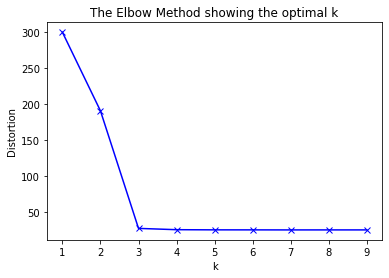

In [103]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters = k, random_state = 0).fit(Scarborough_Grouped_Clustering)
    distortions.append(sum(np.min(cdist(Scarborough_Grouped_Clustering, 
                                        kmeanModel.cluster_centers_, 'canberra'), 
                                  axis = 1)) / Scarborough_Grouped_Clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [60]:
Neighborhoods_Venues_Sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Scarborough_Merged = df2.iloc[:16,:]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Scarborough_Merged = Scarborough_Merged.join(Neighborhoods_Venues_Sorted.set_index('Neighborhood'), 
                                             on='Neighborhood')

Scarborough_Merged.head(4)

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.81139,-79.19662,0,Zoo Exhibit,Fast Food Restaurant,Paintball Field,Fish & Chips Shop,Filipino Restaurant,Field,Fish Market,Farmers Market,Farm,Doner Restaurant
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.78574,-79.15875,2,Bar,Construction & Landscaping,Fish & Chips Shop,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Ethiopian Restaurant,Event Space
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.76575,-79.17470,1,Park,Athletics & Sports,Gym / Fitness Center,Gymnastics Gym,Yoga Studio,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
3,M1G,Scarborough,Woburn,43.76812,-79.21761,1,Park,Chinese Restaurant,Fast Food Restaurant,Coffee Shop,Yoga Studio,Ethiopian Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School


### Map 

In [61]:
kclusters = 10

In [102]:
# create map
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(Scarborough_Merged['Latitude'], 
                                   Scarborough_Merged['Longitude'], 
                                   Scarborough_Merged['Neighborhood'], 
                                   Scarborough_Merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#4856fb', '#10a2f0', '#2adddd', '#62fbc4', '#9cfba4', '#d4dd80', '#ffa256', '#ff562c', '#ff0000']


In [63]:
# Cluster 1
df_1 = Scarborough_Merged.loc[Scarborough_Merged['Cluster Labels'] == 0,
                             Scarborough_Merged.columns[[2] + 
                                                        list(range(5, Scarborough_Merged.shape[1]))]]
# Cluster 2
df_2 = Scarborough_Merged.loc[Scarborough_Merged['Cluster Labels'] == 1,
                           Scarborough_Merged.columns[[2] + 
                                                      list(range(5, Scarborough_Merged.shape[1]))]]
# Cluster 3
df_3 = Scarborough_Merged.loc[Scarborough_Merged['Cluster Labels'] == 2,
                              Scarborough_Merged.columns[[2] + 
                                                         list(range(5, Scarborough_Merged.shape[1]))]]

In [76]:
df_1 # cluster 1

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Malvern, Rouge",0,Zoo Exhibit,Fast Food Restaurant,Paintball Field,Fish & Chips Shop,Filipino Restaurant,Field,Fish Market,Farmers Market,Farm,Doner Restaurant


In [77]:
df_2 # cluster 2

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Guildwood, Morningside, West Hill",1,Park,Athletics & Sports,Gym / Fitness Center,Gymnastics Gym,Yoga Studio,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
3,Woburn,1,Park,Chinese Restaurant,Fast Food Restaurant,Coffee Shop,Yoga Studio,Ethiopian Restaurant,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School
9,"Birch Cliff, Cliffside West",1,General Entertainment,College Stadium,Park,Gym,Café,Skating Rink,Escape Room,Dumpling Restaurant,Eastern European Restaurant,Electronics Store
10,"Dorset Park, Wexford Heights, Scarborough Town...",1,Bakery,Gift Shop,Park,Asian Restaurant,Coffee Shop,Ethiopian Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store


In [78]:
df_3 # cluster 3

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Rouge Hill, Port Union, Highland Creek",2,Bar,Construction & Landscaping,Fish & Chips Shop,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Ethiopian Restaurant,Event Space
4,Cedarbrae,2,Thai Restaurant,Bakery,Caribbean Restaurant,Gas Station,Athletics & Sports,Hakka Restaurant,Bank,Playground,Fish & Chips Shop,Dumpling Restaurant
5,Scarborough Village,2,Sandwich Place,Fast Food Restaurant,Train Station,Indian Restaurant,Big Box Store,Restaurant,Farmers Market,Field,Filipino Restaurant,Farm
6,"Kennedy Park, Ionview, East Birchmount Park",2,Coffee Shop,Flower Shop,Hobby Shop,Department Store,Falafel Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room,Ethiopian Restaurant
7,"Golden Mile, Clairlea, Oakridge",2,Intersection,Bus Line,Bakery,Diner,Convenience Store,Soccer Field,Ice Cream Shop,Park,Bus Station,Coffee Shop
8,"Cliffside, Cliffcrest, Scarborough Village West",2,Ice Cream Shop,Pharmacy,Sandwich Place,Park,Pizza Place,Chinese Restaurant,Hardware Store,Discount Store,Bistro,Liquor Store
11,"Wexford, Maryvale",2,Hookah Bar,African Restaurant,Gas Station,Pizza Place,Halal Restaurant,Event Space,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School
12,Agincourt,2,Shopping Mall,Pool,Bakery,Sushi Restaurant,Latin American Restaurant,Supermarket,Pharmacy,Bubble Tea Shop,Skating Rink,Shanghai Restaurant
13,"Clarks Corners, Tam O'Shanter, Sullivan",2,Fast Food Restaurant,Pizza Place,Spa,Market,Shopping Mall,Bank,Fried Chicken Joint,Beer Store,Liquor Store,Mexican Restaurant
14,"Milliken, Agincourt North, Steeles East, L'Amo...",2,Intersection,Sandwich Place,Pharmacy,Sushi Restaurant,Yoga Studio,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Escape Room


In [64]:
Scarborough_Avg_HousingPrice = pd.DataFrame({"Neighborhood":df2["Neighborhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0,
                                                               435000.0,289500.0,265000.0,285900.0,239400.0,
                                                               589900.0,295000.0,380500.0,378500.0,438500.0,229200.0,
                                                               229200.0,365000.0,388500.,285400.0,493500.0,477500.0,378000.0,316600.0,195000.0,225900.0,219400.0,
                                                               573900.0,367000.0,370500.0,370500.0,363500.0,279200.0,
                                                               279200.0,271000.0,370500.,255400.0,383500.0,433500.0,335000.0,286600.0,185000.0,225900.0,219400.0,
                                                               573900.0,329000.0,370500.0,370500.0,533500.0,279200.0,
                                                               279200.0,375000.0,370500.,255400.0,493500.0,433500.0,335000.0,286600.0,165000.0,225900.0,219400.0,
                                                               573900.0,425000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,195000.0,370500.,255400.0,403500.0,433500.0,335000.0,286600.0,187000.0,225900.0,219400.0,
                                                               573900.0,325000.0,370500.0,370500.0,333500.0,279200.0,
                                                               279200.0,289000.0,370500.,255400.0,413500.0,433500.0,254800.0
                                                              
                                                              
                                                              ]})

In [65]:
Scarborough_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

In [89]:
Scarborough_Avg_HousingPrice_Sorted = Scarborough_Avg_HousingPrice.sort_values(by = ['Average_Housing_Price'], ascending=False)

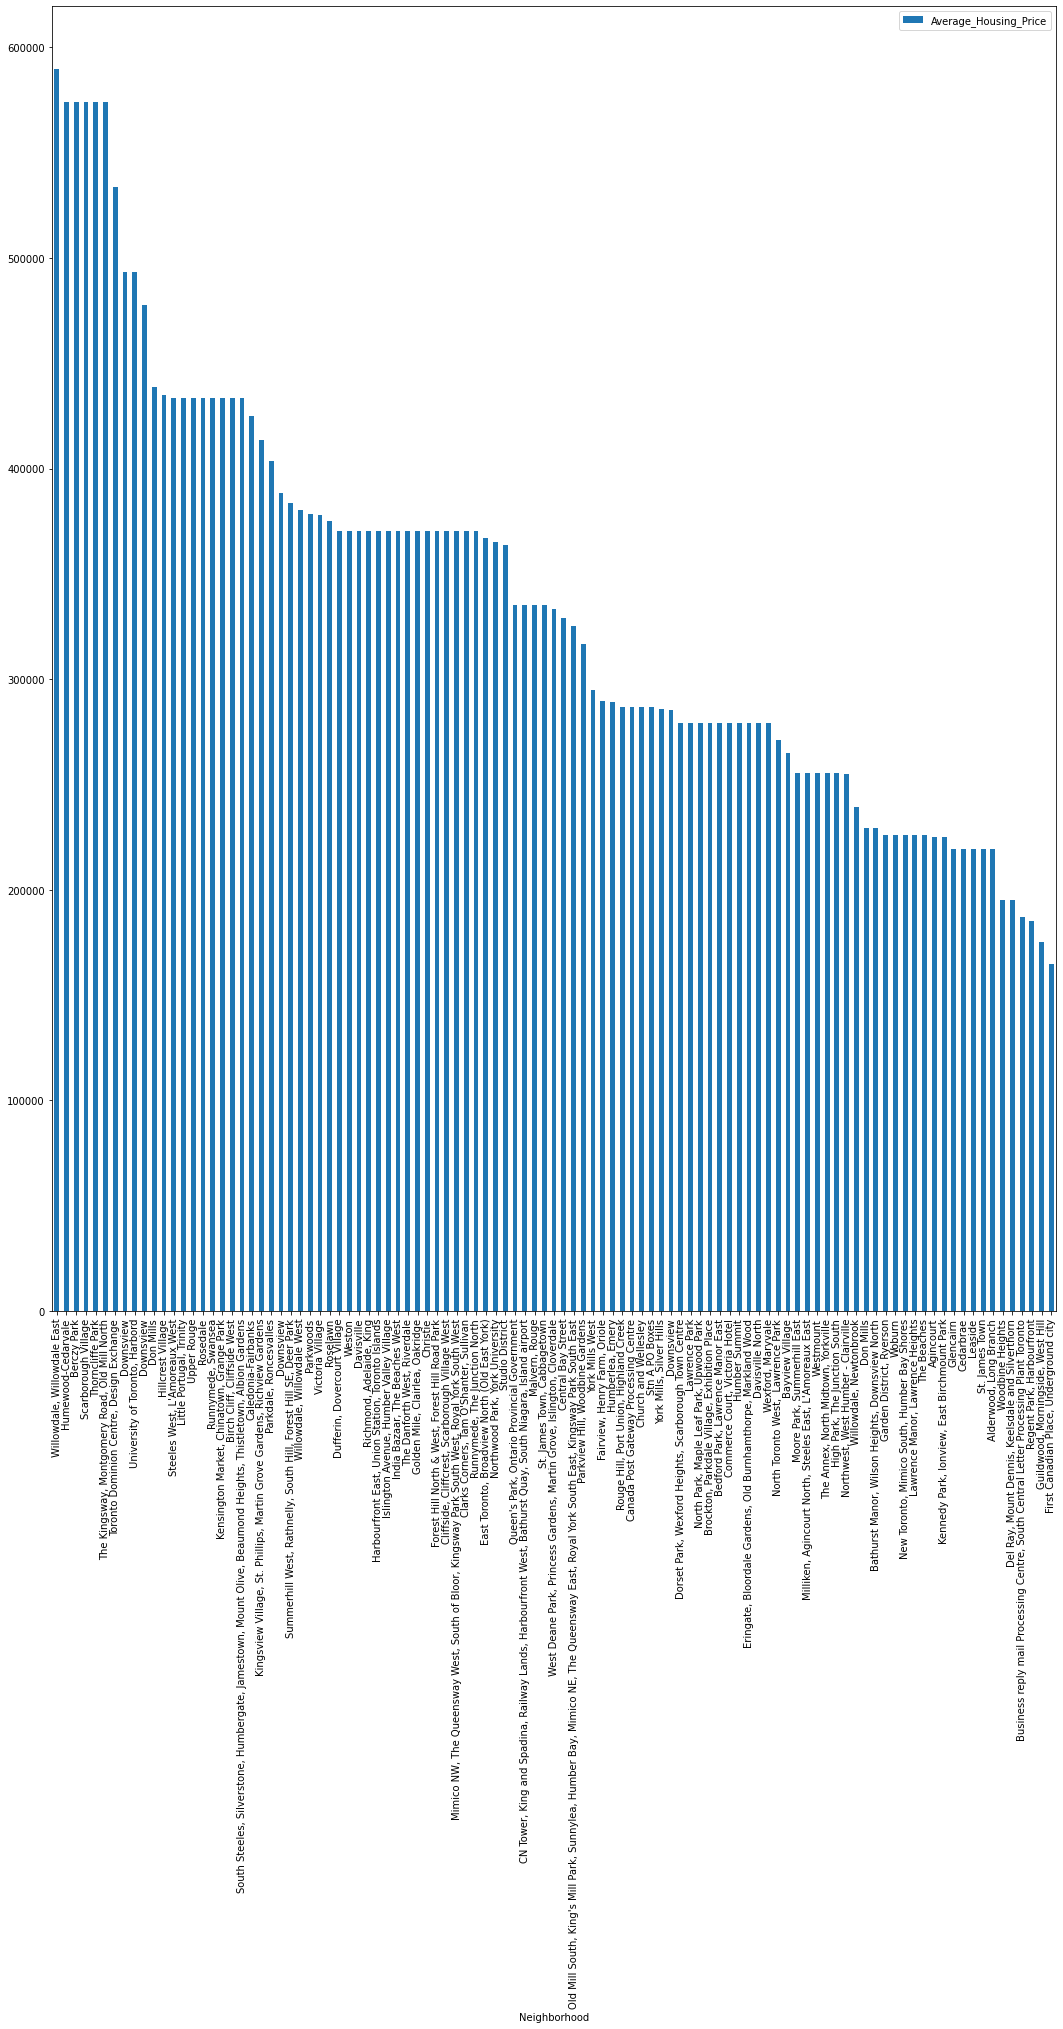

In [99]:
Scarborough_Avg_HousingPrice_Sorted.plot.bar( rot = 90, figsize = (18,24))

<AxesSubplot:title={'center':'Scarborough Average Housing Prices'}, xlabel='Neighborhood'>

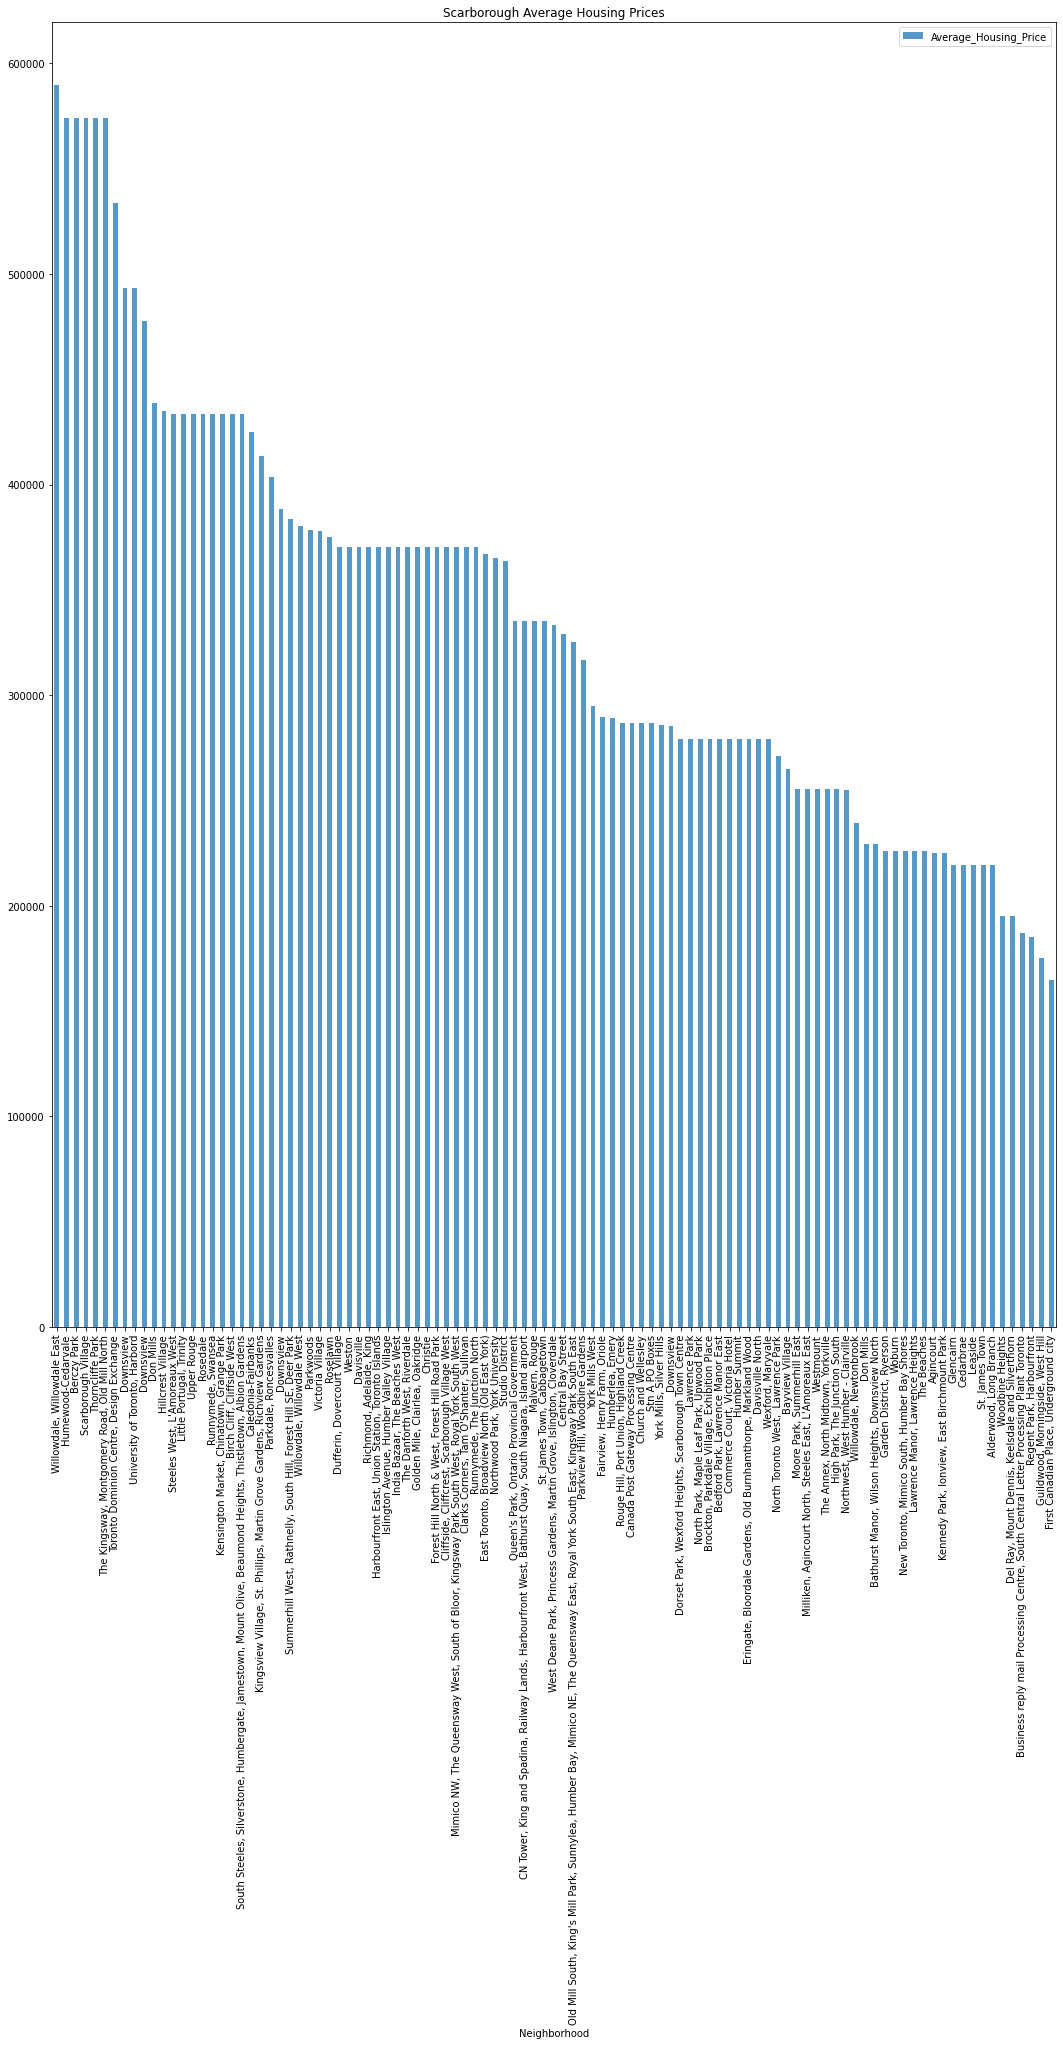

In [91]:
Scarborough_Avg_HousingPrice_Sorted.plot(kind = 'bar',figsize = (18,24),
                                  alpha = 0.75, title = "Scarborough Average Housing Prices")

### School rating by cluster neighcourhoods

In [67]:
clusters = pd.DataFrame({"Cluster1":df_1["Neighborhood"],
                      "Cluster2":df_2["Neighborhood"],
                      "Cluster4":df_3["Neighborhood"]})
clusters = clusters.replace(np.nan, '', regex=True)

In [68]:
new_Scarborough = Scarborough_Merged.set_index("Neighborhood",drop=True)
#Source:https://www.greatschools.org
Scarborough_school_ratings = pd.DataFrame({"Neighborhood":df["Neighborhood"],
                                      "Top School Rating":[7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,
                                                           5,4,8,9,9,6,6,4,5,4,6,8,10,8,9,6,2,
                                                           10,2,5,8,9,6,6,10,8,9,1,2,3,4,5,6,9,
                                                           8,5,9,6,9,6,4,8,10,2,5,6,3,9,8,7,
                                                           7,8,5,8,9,1,5,4,7,2,3,6,6,9,4,8,7,
                                                           4,8,9,2,6,4,7,5,10,4,6,8,9,7,5,6,5,8,7
                                                           ]})

In [69]:
Scarborough_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

In [93]:
Scarborough_school_ratings_sorted = Scarborough_school_ratings.sort_values(by = ["Top School Rating"], ascending = False)

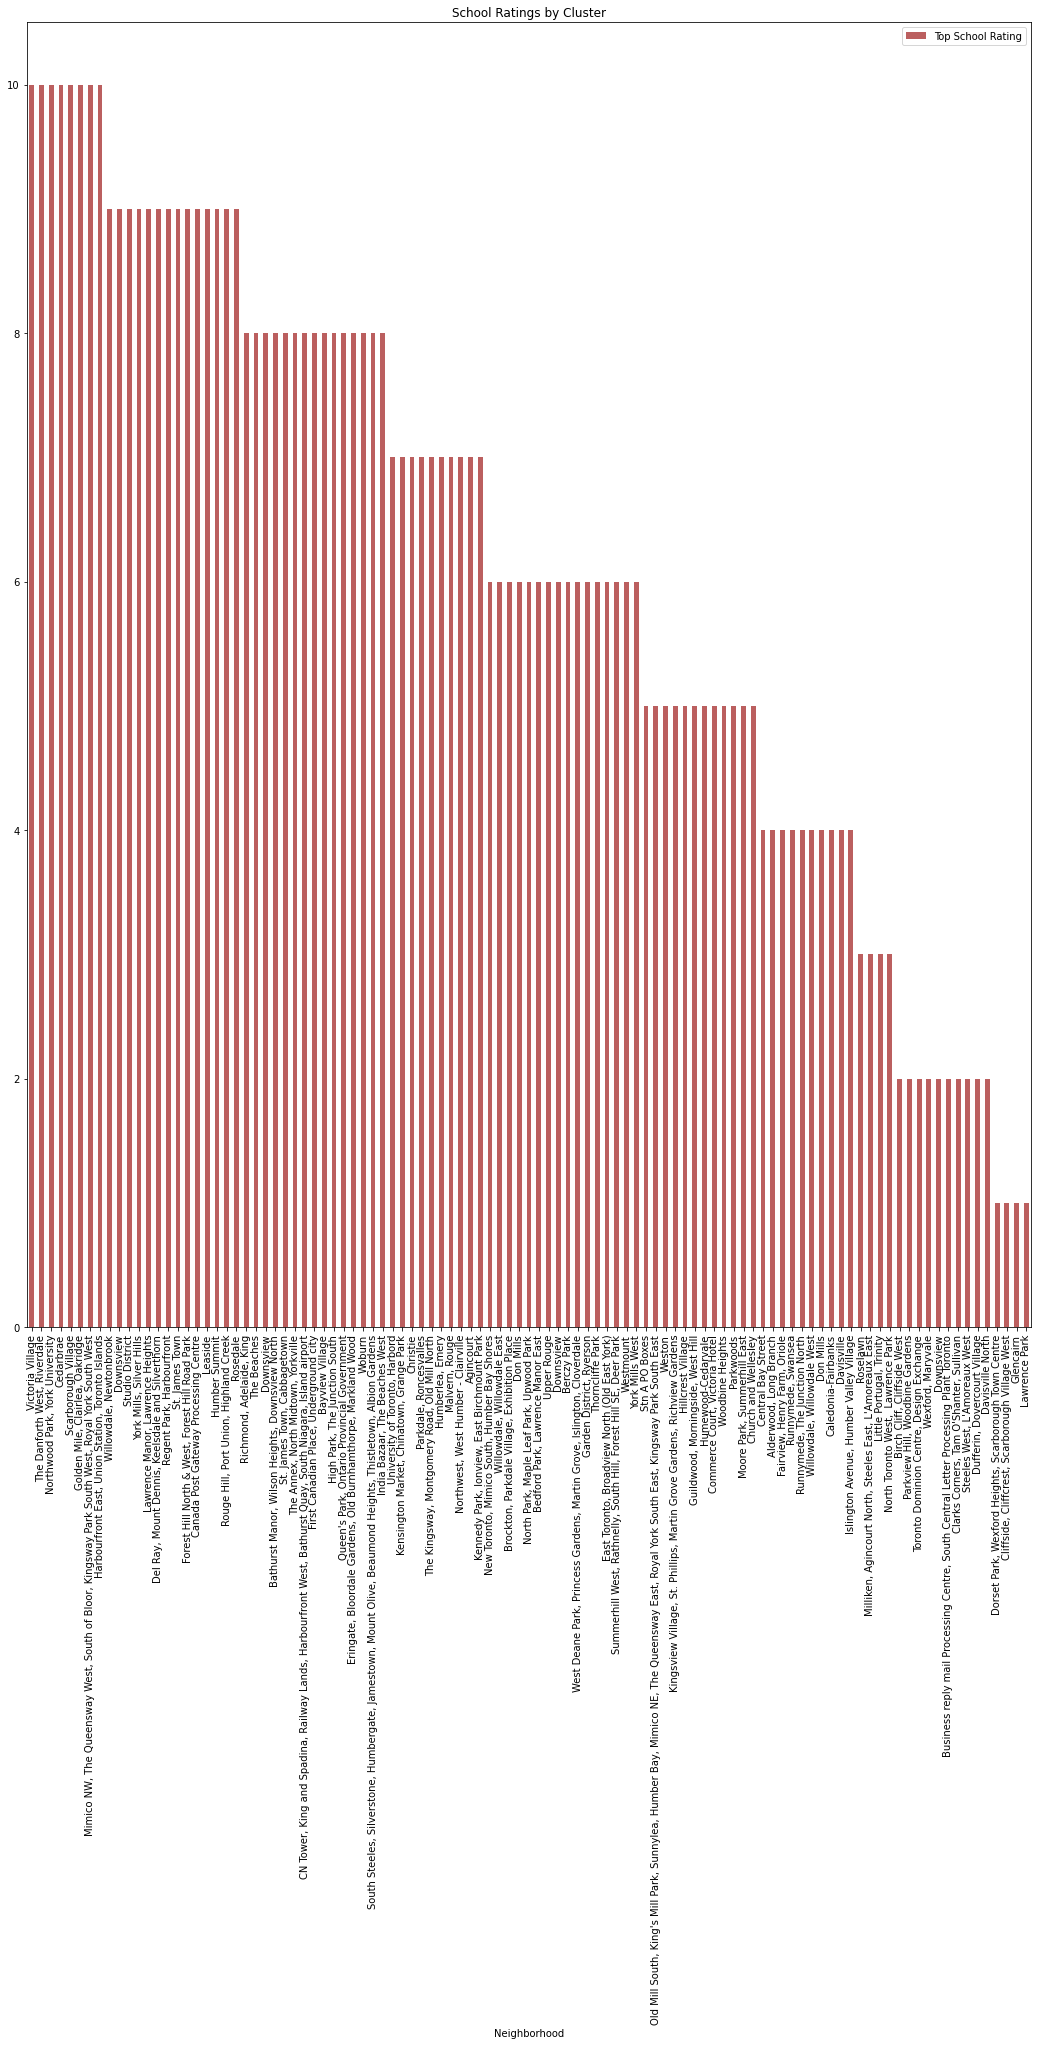

In [100]:
Scarborough_school_ratings_sorted.plot(kind='bar',figsize=(18,24),color='brown',
                                alpha=0.75, title = "School Ratings by Cluster")

## Discussion <a name="discussion"></a>

Scarborough, Toronto is a big city with a high population density in a narrow area. As there is such a complexity, very different approaches can be tried in clustering and classification studies. Moreover, it is obvious that not every classification method can yield the same high quality results for this metropol.

I used the Kmeans algorithm as part of this clustering study. When I tested the Elbow method, I set the optimum k value to 3. However, only 39 district coordinates were used. For more detailed and accurate guidance, the data set can be expanded and the details of the neighborhood or street can also be drilled.

Most of the neighbourhoods are in cluster 3.

I also performed data analysis through this information by adding the coordinates of districts and home sales price averages as static data on GitHub. In future studies, these data can also be accessed dynamically from specific platforms or packages.

I ended the study by visualizing the data and clustering information on the Scarborough map. In future studies, web or telephone applications can be carried out to direct investors.

## Conclusion <a name="conclusion"></a>

As a result, people are turning to big cities to start a business or work. For this reason, people can achieve better outcomes through their access to the platforms where such information is provided.

Not only for investors but also city managers can manage the city more regularly by using similar data analysis types or platforms.

## References <a name="references"></a>

* [1] [Scarborough, Toronto, Wikipedia Page](https://en.wikipedia.org/wiki/Scarborough,_Toronto)

* [2] [Foursquare Developers Website](https://developers.foursquare.com)

* [3] [List of postal codes in Canada Data in Wikipedia](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)

* [4] [Google Website](https://www.google.com)

* [5] [Great Schools Website](https://www.greatschools.org)